<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br>Assignment 2 [GROUP PROJECT]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment2_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : hs3458, kem2231
#### **Your Full names** : Harini Sundararajan, Kate McGrath
#### **Your AI Model Share Usernames**: harinisund,
#### **Link to your Public Github repository** : Fill here (single link is expected)
#### **Team member Contribution Percentages** : Fill here

---
<br>

This notebook contains starter code (and instructions) for our 2nd assignment where we'll work with COVID data. For this assignment you are expected to work in groups. Each group has to make a single assihnment submission.<br><br>
You shall be graded on your learning and initiative outside classroom,  understanding and correctness.
<br><br>
<b>Treat this as a major project where you go looking for the best methods to prepare data, experiment with and train different models, and evaluate results as holistically as possible.</b>
<br><br>
Short but to-the-point answers to conceptual questions are acceptable as long as they convey your ideas effectively.<br><br>
Reference codes have been given for an understanding of what is to be done. Refrain from using the same for your submissions.<br><br>
Marks may be deducted for failure to adhere to any instructions provided in the cell blocks below.<br><br><br>


Instructions for this assignment:

1. Your final report should be written up in a Jupyter notebook. It should be posted to a **public** Github repo as an ipynb. This notebook ipynb would be submitted as an assignment via courseworks. Please include the link to your Github repo in this ipynb file.
<br><br>
2. **Your report should include the following information:**
    * Citation of paper providing original dataset:  M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, [Link](https://arxiv.org/abs/2003.13145)<br><br>
3. **Overall Outline of this notebook**
    * Visualize images that demonstrate when x-rays demonstrate Covid Positivity. You can do other basic data visualization steps here. <span style="color:yellow;"> (5 pts)</span> <br><br>
    * Analyze the dataset and explain the outcomes. Perform Image Augmentation on the dataset <span style="color:yellow;"> (10 pts)</span><br><br>
    * Run at least 4 prediction models to try to predict x-ray images well.<span style="color:yellow;"> (45 pts)</span>
        * Use at the minimum 2 from-scratch CNN models and minimum 2 transfer learning models
        * Answer questions and Discuss which models performed better and point out relevant hyper-parameter values for successful models.
        * Submit your best three models to the leader board for the Covid X-ray Diagnostic AI Model Share competition.<br><br>
    * After you submit your first 4 models, experiment with finding the best model with your team<span style="color:yellow;"> (10 pts)</span>
        * Fit and submit atleast one more and up to three more models after discussion with your team. This part is to encourage you to try different architectures and get competitive or better accuracies.
        *  Discuss results<br><br>
    * Discuss exhaustively which models you tried finally and compare properly which models performed better. <span style="color:yellow;"> (15 pts)</span><br><br>
4. Make the Python Code repo, Front end notebook, Final report and README file. Mention the citations, and your model evaluations and discussion in your `README`, and ensure your `README` looks professional. Examples are in the section. <span style="color:yellow;"> (15 pts)</span>


---

# **STEP 0: Install the `ai modelshare` package**

In [ ]:
# Begin to submit models to image classification leaderboard
! pip install aimodelshare --upgrade
# Restart session Runtime > Restart runtime

# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to your drive. The code assume you will upload it to your base folder in drive... however you can change the directory (just make sure to update the path accordingly)**

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [ ]:
## You can upload this data to your won drive and change the above path so you don't have to upload and unzip data everytime. Change folder base path below accordingly.

In [2]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3, InceptionResNetV2, ResNet101, ResNet152
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# **STEP 2: Prepare the dataset**

In [3]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']


# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)


print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2854.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3604.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2603.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-43.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1771.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3389.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-693.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2431.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1005.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2742.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-945.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3157.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-821.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1540.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-305.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID

In [4]:
#Reduce number of images to first 1345 for each category
fnames[0] = fnames[0][0:1344]
fnames[1] = fnames[1][0:1344]
fnames[2] = fnames[2][0:1344]

In [5]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image



def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((224,224,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(224, 224, 3)

In [6]:
#Import image files iteratively and preprocess them into array of correctly structured data


# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]


# Iteratively import and preprocess data using map function


# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor, image_filepaths))


# Object needs to be an array rather than a list for Keras (map returns to list object)
X = np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
'''print(len(X) )          # same number of elements as filenames

print(X.shape )         # dimensions now 192,192,3 for all images

print(X.min().round() ) # min value of every image is zero

print(X.max() )         # max value of every image is one
'''

4032
(4032, 192, 192, 3)
-0.0
1.0


In [7]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat


# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))


#combine into single list of y labels
y_labels = covid + normal + pneumonia


#check length, same as X above
print(len(y_labels))


# Need to one hot encode for Keras.  Let's use Pandas
import pandas as pd
y = pd.get_dummies(y_labels)


display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4027,0,0,1
4028,0,0,1
4029,0,0,1
4030,0,0,1


# **STEP 3: Visualizations <span style="color:yellow;">(5pts)</span>**

**Use the `fnames` variable to extract images from all possible combinations of input data and plot them below. Make sure to label each plot appropriately**

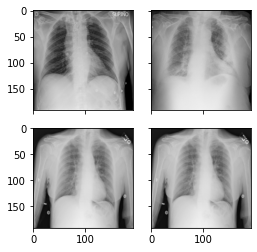

In [ ]:
# your code here

# **STEP 4: Analyzing and Augmenting Dataset <span style="color:yellow;">(10pts)</span>**


What are the data analysis steps you performed? What did you notice? What are you conclusions?

In [ ]:
## Your answer here
# look at example images from each category and call out visual differences

In [8]:
# Implement Data Augmentation steps (here or above during preprocessing)
train_datagen = ImageDataGenerator(
    zoom_range = 0.1, # apply random zoom transformations
    rotation_range = 15, # randomly rotate images by 15 degrees
    width_shift_range = .05, # randomly shift images horizontally by 5% of the width
    height_shift_range = .05) # randomly shift images vertically by 5% of the height

'''train_datagen = ImageDataGenerator(
    rotation_range=20,        # randomly rotate images by 20 degrees
    width_shift_range=0.2,    # randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,   # randomly shift images vertically by 20% of the height
    shear_range=0.2,          # apply random shear transformations
    zoom_range=0.2,           # apply random zoom transformations
    horizontal_flip=True,     # randomly flip images horizontally
    fill_mode='nearest'       # fill in missing pixels with the nearest value
)'''

''' # Create an iterator for the augmented data
augmented_iterator = train_datagen.flow(X_train, y_train, batch_size=32)
# Example of using the iterator to generate augmented data batches
num_batches = 5
for i in range(num_batches):
    batch_x, batch_y = augmented_iterator.next()
    print("Batch", i+1, ":", batch_x.shape, batch_y.shape)'''

'''# Load validation data (no augmentation)
validation_generator = test_datagen.flow_from_directory('validation_directory',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')'''

'''def augment_data(images, labels, batch_size):
    num_samples = images.shape[0]
    while True:
        # Generate random indices for creating a batch
        indices = np.random.choice(num_samples, batch_size)

        # Generate augmented images and labels
        batch_images = images[indices]
        batch_labels = labels[indices]
        augmented_images, augmented_labels = [], []
        for i in range(batch_size):
            # Apply augmentation to each image individually
            augmented_image = datagen.random_transform(batch_images[i])
            augmented_images.append(augmented_image)
            augmented_labels.append(batch_labels[i])

        # Convert augmented data to numpy arrays
        augmented_images = np.array(augmented_images)
        augmented_labels = np.array(augmented_labels)

        yield augmented_images, augmented_labels'''

'def augment_data(images, labels, batch_size):\n    num_samples = images.shape[0]\n    while True:\n        # Generate random indices for creating a batch\n        indices = np.random.choice(num_samples, batch_size)\n\n        # Generate augmented images and labels\n        batch_images = images[indices]\n        batch_labels = labels[indices]\n        augmented_images, augmented_labels = [], []\n        for i in range(batch_size):\n            # Apply augmentation to each image individually\n            augmented_image = datagen.random_transform(batch_images[i])\n            augmented_images.append(augmented_image)\n            augmented_labels.append(batch_labels[i])\n\n        # Convert augmented data to numpy arrays\n        augmented_images = np.array(augmented_images)\n        augmented_labels = np.array(augmented_labels)\n\n        yield augmented_images, augmented_labels'

What specific preprocessing and augmentation strategies did you apply to your dataset, and why? How would these strategies improve your model's training and generalization?

# **STEP 5: Splitting Dataset**

**No coding to be done here**

In [9]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)

In [10]:
#Clear objects from memory

del(X)
del(y)
del(preprocessed_image_data)

In [11]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle


# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)


# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)


# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [12]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

# **STEP 6: Model Training and parameter tuning <span style="color:yellow;"> (45pts)</span>**

**Define your model architecture, define the model parameters, define the training parameters, define the training values. <br><br>
Use the code provided below as a reference.<br><br>
Test out as many models here as you want, but submit (to aimodelshare) only your final models. Excessive submissions will be penalized.<br><br>**


#### REFERENCE CODE TO DEFINE MODELS


``` python
import tensorflow as tf
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 5 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, epochs = 1, verbose=1,validation_split=.2) #, callbacks=[red_lr]) for callback that automatically adjusts lr
```

<br><br>
#### REFERENCE CODE TO SAVE MODELS

```python
model.save("model1.h5", save_format="h5")
```

<br><br>
#### REFERENCE CODE TO RELOAD MODELS INCASE YOU LOSE PROGRESS

```python
# Reload model and data
import tensorflow as tf
model = tf.keras.models.load_model('model1.h5',compile=False)
model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()
```

<br><br>
#### REFERENCE CODE TO SAVE MODEL IN ONNX FORMAT

```python
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx


onnx_model = model_to_onnx(
                            model,
                            framework='keras',
                            transfer_learning=False,
                            deep_learning=True
                          )


with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
```


<br><br>
#### REFERENCE CODE TO SUBMIT PREDICTIONS

```python
#Use X_test data to generate model predictions and make leaderboard submission

#Generate and save predictions

#Load preprocessed data
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  

# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)
    

prediction_column_index=model.predict(X_test).argmax(axis=1)


# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]


# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model.onnx",
                        preprocessor_filepath="preprocessor.zip",
                        prediction_submission=prediction_labels
                        )
```

<br><br>
#### REFERENCE CODE TO CHECK LEADERBOARD

```python
data = experiment.get_leaderboard()
experiment.stylize_leaderboard(data)
```

In [ ]:
# Save preprocessor function (may need to reload function in cell above)
import aimodelshare as ai
from aimodelshare.aws import set_credentials

ai.export_preprocessor(preprocessor,"")

apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

experiment= ai.Experiment(apiurl)

set_credentials(apiurl=apiurl)

# NOTE :

**In the following sections, keep proper track of your experimentations, models (name them properly), their histories (both as csv's and exported images of loss curves), evaluations and results (export csv's and keep track), and their saved model exports (.h files).**

You will need to upload the final saved models and download them later as weights to build an inference engine. Your results should be reproducible, so use random seeds at appropriate places.

# **STEP 6(a): Custom CNN based models**

You will build a minimum of 2 CNN models. The depth of all models should be a minimum of 12 Convolutional layers (not counting BatchNorms, Pools and Activations). Print model summaries with Input shape defined.

In [ ]:
# your code here

1. What motivated your specific architectural design choices when implementing your custom CNNs? Discuss the reasoning behind the number of layers, types of layers (convolutional, pooling, fully connected, etc.), and their configurations.
2. Which regularization techniques and callbacks did you implement to prevent overfitting? Explain how you chose where to apply these techniques and their effectiveness.
3. Describe your approach to hyperparameter tuning. How did you select the values for learning rate, batch size, and number of epochs? Discuss any strategies you used to find the optimal hyperparameters.
4. Which loss function and optimizer did you choose for training your CNN, and why? How do these choices impact the convergence and accuracy of your model?
5. Reflect on a significant challenge you encountered during the implementation of your CNN. How did you overcome this challenge, and what did you learn from it?

In [ ]:
# Your answers and discussion here

Deep convolutional neural networks typically perform better
with a larger dataset than a smaller one. Transfer learning can
be used in the training of deep CNNs where the dataset is not
large. The concept of transfer learning uses the trained model
from large dataset such as ImageNet [58] and modify the
Softmax and classification layer of the pre-trained networks.
The pre-trained weights are then used for faster training of the
network for an application with comparatively smaller dataset.
This removes the requirement of having large dataset and also
reduces the long training period as is required by the deep
learning algorithm when developed from scratch

# **STEP 6(b): Transfer Learning models**

You will use a minimum of 2 Pre-trained models and Fine-tune them on our dataset. Take careful choices about which models you get from the internet. Cite their usage properly within this notebook, and in the Github repo (instructions in last section).


In [28]:
# Load the pre-trained ResNet50 model without the top (classification) layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base ResNet50 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer, convert features into 1D array
    Dense(256, activation='relu'),  # Fully connected layer with 224 neurons
#    Dropout(0.5),  # Dropout layer to prevent overfitting (50% dropout rate)
    Dense(256, activation='relu'),  # Additional fully connected layer with 256 neurons
#    Dropout(0.3),  # Dropout layer to prevent overfitting (30% dropout rate)
    Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
    Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
    Dense(128, activation='relu'),  # Additional fully connected layer with 64 neurons
    Dense(3, activation='softmax')  # Output layer for multi-class classification with 3 classes
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #,'recall','specificity','precision','f1_score'

# augment training data
train_datagen.fit(X_train)

#callbacks
#reduce lr callback
#red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
# Define model checkpoint callback
checkpoint_path = "model_checkpoint.h5"
checkpoint_cb = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
# Define early stopping callback
early_stop= EarlyStopping(monitor='val_loss',
                                        patience=3,  # Number of epochs with no improvement after which training will be stopped
                                        verbose=1)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

batch_size=32
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    callbacks=[early_stop],
    validation_data=(X_test, y_test)
    )

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
85/85 [==============================] - 45s 475ms/step - loss: 1.1059 - accuracy: 0.3378 - val_loss: 1.0985 - val_accuracy: 0.3331
Epoch 2/10
85/85 [==============================] - 38s 448ms/step - loss: 1.0950 - accuracy: 0.3621 - val_loss: 1.0768 - val_accuracy: 0.4059
Epoch 3/10
85/85 [==============================] - 37s 430ms/step - loss: 1.0670 - accuracy: 0.4190 - val_loss: 1.0752 - val_accuracy: 0.3610
Epoch 4/10
85/85 [==============================] - 38s 445ms/step - loss: 1.0551 - accuracy: 0.4208 - val_loss: 0.9843 - val_accuracy: 0.5469
Epoch 5/10
85/85 [==============================] - 37s 431ms/step - loss: 1.0021 - accuracy: 0.4946 - val_loss: 0.9240 - val_accuracy: 0.5531
Epoch 6/10
85/85 [==============================] - 38s 447ms/step - loss: 0.9628 - accuracy: 0.5161 - val_loss: 0.9087 - val_accuracy: 0.5507
Epoch 7/10
85/85 [==============================] - 37s 436ms/step - loss: 0.9255 - accuracy: 0.5382 - val_loss: 0.8692 - val_accuracy: 0.5732

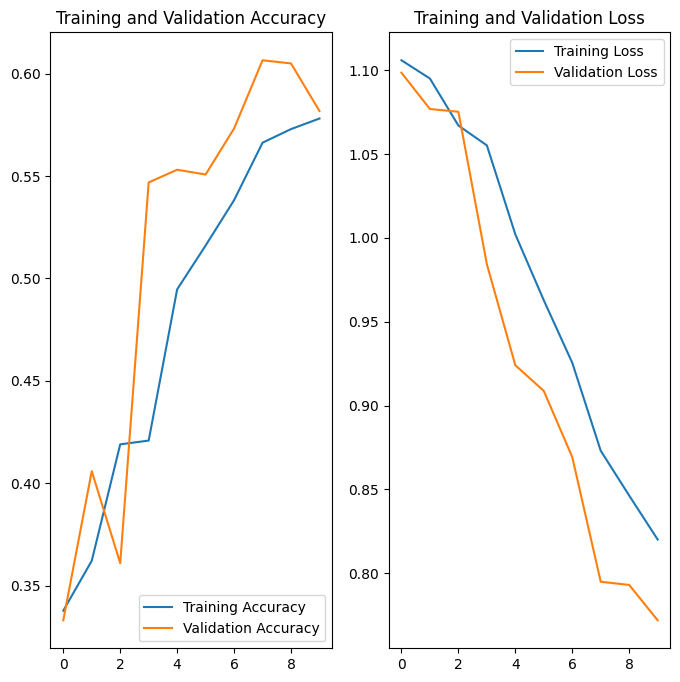

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
## finetuning
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=Adam(learning_rate=1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train end-to-end. Be careful to stop before you overfit!
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    callbacks=[early_stop],
    validation_data=(X_test, y_test)
    )

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
85/85 [==============================] - 82s 581ms/step - loss: 5.0499 - accuracy: 0.5183 - val_loss: 50.8679 - val_accuracy: 0.3331
Epoch 2/10
51/85 [=================>............] - ETA: 17s - loss: 0.7270 - accuracy: 0.6601

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

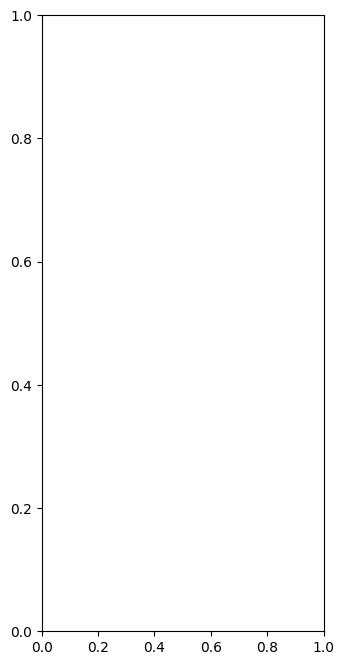

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base ResNet50 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer, convert features into 1D array
    Dense(256, activation='relu'),  # Fully connected layer with 224 neurons
#    Dropout(0.5),  # Dropout layer to prevent overfitting (50% dropout rate)
    Dense(256, activation='relu'),  # Additional fully connected layer with 256 neurons
#    Dropout(0.3),  # Dropout layer to prevent overfitting (30% dropout rate)
    Dense(128, activation='relu'),  # Additional fully connected layer with 128 neurons
    Dense(64, activation='relu'),  # Additional fully connected layer with 64 neurons
    Dense(3, activation='softmax')  # Output layer for multi-class classification with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# augment training data
train_datagen.fit(X_train)

# Create augmented data generator
batch_size=32
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    callbacks=[early_stop],
    validation_data=(X_test, y_test)
    )
#history = model.fit(, steps_per_epoch=len(X_train) // batch_size, epochs=10)
#history = model.fit(augmented_images,augmented_labels, batch_size=32, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
85/85 [==============================] - 57s 557ms/step - loss: 0.5905 - accuracy: 0.7405 - val_loss: 0.5262 - val_accuracy: 0.7552
Epoch 2/10
85/85 [==============================] - 37s 439ms/step - loss: 0.4079 - accuracy: 0.8202 - val_loss: 0.4985 - val_accuracy: 0.7676
Epoch 3/10
85/85 [==============================] - 35s 416ms/step - loss: 0.3560 - accuracy: 0.8427 - val_loss: 0.3654 - val_accuracy: 0.8428
Epoch 4/10
85/85 [==============================] - 36s 424ms/step - loss: 0.3522 - accuracy: 0.8435 - val_loss: 0.4275 - val_accuracy: 0.8203
Epoch 5/10
85/85 [==============================] - 39s 465ms/step - loss: 0.3235 - accuracy: 0.8553 - val_loss: 0.4326 - val_accuracy: 0.8002
Epoch 6/10
85/85 [==============================] - 38s 450ms/step - loss: 0.3288 - accuracy: 0.8645 - val_loss: 0.3288 - val_accuracy: 0.8575
Epoch 7/10
85/85 [==============================] - 38s 443ms/step - loss: 0.2965 - accuracy: 0.8782 - val_loss: 0.4534 - val_accuracy: 0.8265

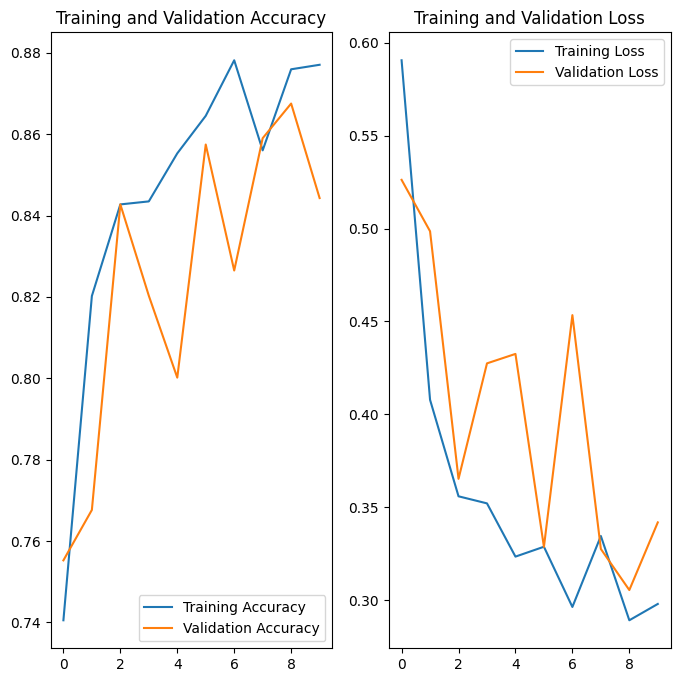

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## finetuning
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=Adam(learning_rate=1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train end-to-end. Be careful to stop before you overfit!
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    callbacks=[early_stop],
    validation_data=(X_test, y_test)
    )

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x792d0da63520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


85/85 [==============================] - 141s 600ms/step - loss: 0.7165 - accuracy: 0.7003 - val_loss: 0.4418 - val_accuracy: 0.8242
Epoch 2/10
85/85 [==============================] - 44s 518ms/step - loss: 0.3632 - accuracy: 0.8568 - val_loss: 0.4427 - val_accuracy: 0.8211
Epoch 3/10
 7/85 [=>............................] - ETA: 42s - loss: 0.3858 - accuracy: 0.8170

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1. Which Models did you try for Transfer Learning? What was the pre-trained model originally trained on?
2. Which models converged faster upon fine-tuning? Why do you think that happened?
3. How did you do fine-tuning on this dataset? (What layers did you add / freeze / unfreeze), How many parameters were there in total in the pretrained model you finetuned? How many trainable and untrainable?
4. How does the performance of your Transfer Learning model compare with a model trained from scratch on the same task? Discuss the advantages and potential limitations of using Transfer Learning in this context.
5. Throughout the coding process, what was the most difficult decision you had to make, and how did you arrive at your final choice?




In [ ]:
# your Answers and discussion here

Residual network is a CNN model proposed by four researchers. It has a good effect in image classification and target recognition [24]. The deeper the network model is, the more information can be obtained, and the richer the characteristics are. Data test analysis shows that with the deepening of the deep learning network, the model optimization effect becomes worse, and the accuracy of test data and training data also decreases accordingly. If the gradients between layers are between 0 and 1 and the layers are reduced, the gradients will disappear. On the contrary, if the gradient transferred layer by layer is greater than 1, then the gradient explosion will occur after layer-by-layer expansion. Therefore, a simple stacking layer will inevitably lead to network degradation. In order to make the deeper network train better, He et al. proposed a new network structure, namely, ResNet [31]. The advantage of the residual network is that it can alleviate the problem of gradient disappearance in a neural network. ResNet-34 is used as the primary network in this article.


ResNet50
Residual neural network (ResNet) model is an improved version of CNN. ResNet adds shortcuts between layers to solve a problem. Thanks to this, it prevents the distortion that occurs as the network gets deeper and more complex. In addition, bottleneck blocks are used to make training faster in the ResNet model. ResNet50 is a 50-layer network trained on the ImageNet dataset. ImageNet is an image database with more than 14 million images belonging to more than 20,000 categories created for image recognition competitions.

InceptionV3   
InceptionV3 is a kind of convolutional neural network model. It consists of numerous convolution and maximum pooling steps. In the last stage, it contains a fully connected neural network. As with the ResNet50 model, the network is trained with ImageNet dataset.

Inception-ResNetV2
The model consists of a deep convolutional network using the Inception-ResNetV2 architecture that was trained on the ImageNet-2012 dataset. The input to the model is a 299 × 299 image, and the output is a list of estimated class probabilities.

ResNet101 and ResNet152   
ResNet101 and ResNet152 consist of 101 and 152 layers, respectively, due to stacked ResNet building blocks. You can load a pre-trained version of the network trained on more than a million images from the ImageNet database. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224 × 224.

# **STEP 7: Additional Models of your choice <span style="color:yellow;"> (10pts)</span>**

---


Please ensure that you are only using Keras / Tensorflow.

In [ ]:
# your code here

Is there a particular part of your code that you're especially proud of optimizing or simplifying? How did you achieve it?

In [ ]:
# your answer here

Did you try any approaches and models taught outside class? What recently released papers / architectures do you wish you could implement given more time?

# **STEP 8: Analysis of your models (15 pts)**

### **<span style="color:red;">Your Answer here:</span>**

Tabularize your results from different models, compare convergence rates, performance metrics and whichever aspects you deem suitable for comparison. Analyze and Discuss results exhaustively.

### **<span style="color:red;">Your Discussion here:</span>**

# **STEP 9: Conclusions**



### **<span style="color:red;">Your Answer here:</span>**




# **STEP 10: Github Repo <span style="color:yellow;"> (15pts)</span>**

<b>Github Repo: </b>

You will exercise **Modularization** and Good Github organization: You should take the relevant code and make it into classes across different python (.py) files so that you can just import those files and/or classes and/or functions and/or modules, instantiate the model using them, load weights from your saved models, and start predicting on any new set of test images (not just the test set from this dataset).

Essentially, you should have a simple and clean **"front-end" notebook** where you download your trained and saved model(s) from say a personal drive link, and have an inference pipeline ready within a few lines of code to predict on any new unseen x-ray images.



<br><br>

In the **README.md** file of your repository should be an overall outline of your experiments, including the models you trained succesfully and have results for - summarized in a tabular way. You can include other details as well.

Look at different readme's across github to see how they are organized. Refer to [this resource](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to learn how to format the file.

- Example of a [Good Readme File](https://github.com/priyavrat-misra/xrays-and-gradcam#readme) (We have no affiliations with Author)
- Example of a [Bad Readme File](https://github.com/anubhavparas/image-classification-using-cnn)
(No offence is intended to Author)

<br><br>
In the **Final report** (.ipynb) notebook, put whatever code, visuals and results you think is relevant adhering to the modularization that you did. It is open ended, you should not just post a copy of this notebook for it.

<br><br>

Remember that this is your showcase to the public.
Cite the dataset as said before. Cite the open source models and any other models or weights you used for Transfer learning.


#### Do not forget to link the final Github repository containing the Front-end running notebook, your code, Readme and Final report at the top of this notebook.